In [ ]:
from load_llff import load_llff_data
import numpy as np


datadir = './data/nerf_llff_data/ania'
factor = 8
spherify = False
llffhold = 8
images, poses, bds, render_poses, i_test = load_llff_data(datadir, factor,
                                                                  recenter=True, bd_factor=.75,
                                                                  spherify=spherify)
# print('images: ', images)
i_test = np.arange(images.shape[0])[::llffhold]
print('Test poses', i_test)

Loaded image data (363, 484, 3, 70) [363.         484.         406.25723024]
Loaded ./data/nerf_llff_data/ania 3.405098876741032 24.197995708856528
recentered (3, 5)
[[ 1.00000000e+00 -2.93343150e-09  4.39543735e-09  1.27724240e-08]
 [ 2.93343194e-09  1.00000000e+00 -1.16310034e-07  1.17506296e-07]
 [-4.39543690e-09  1.16310034e-07  1.00000000e+00 -3.68271564e-08]]
Data:
(70, 3, 5) (70, 363, 484, 3) (70, 2)
HOLDOUT view is 39


: 

In [1]:
from load_llff import load_llff_data
import numpy as np


datadir = './data/nerf_llff_data/ania'
factor = 8
spherify = False
llffhold = 8
images, poses, bds, render_poses, i_test = load_llff_data(datadir, factor,
                                                                  recenter=True, bd_factor=.75,
                                                                  spherify=spherify)
# print('images: ', images)
i_test = np.arange(images.shape[0])[::llffhold]
print('Test poses', i_test)

Loaded image data (363, 484, 3, 70) [363.         484.         406.25723024]
Loaded ./data/nerf_llff_data/ania 3.405098876741032 24.197995708856528
recentered (3, 5)
[[ 1.00000000e+00 -2.93343150e-09  4.39543735e-09  1.27724240e-08]
 [ 2.93343194e-09  1.00000000e+00 -1.16310034e-07  1.17506296e-07]
 [-4.39543690e-09  1.16310034e-07  1.00000000e+00 -3.68271564e-08]]
Data:
(70, 3, 5) (70, 363, 484, 3) (70, 2)
HOLDOUT view is 39
Test poses [ 0  8 16 24 32 40 48 56 64]


In [2]:
import os
imgfiles = sorted(os.listdir('data/nerf_llff_data/ania/images'))

In [3]:
for i in i_test:
    print(imgfiles[i])

IMG_6315.jpg
IMG_6323.jpg
IMG_6331.jpg
IMG_6339.jpg
IMG_6347.jpg
IMG_6355.jpg
IMG_6363.jpg
IMG_6371.jpg
IMG_6379.jpg


提取Tensorboard中的数据，并绘图

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

# 定义日志文件路径
event_acc_lego = EventAccumulator('logs/summaries/blender_paper_lego375021').Reload()
event_acc_ania = EventAccumulator('logs/summaries/ania426775').Reload()
event_acc_fortress = EventAccumulator('logs/summaries/fortress374962').Reload()


# 提取 epoch, loss 和 psnr 数据
epochs_train_lego = [x.step for x in event_acc_lego.Scalars('train/loss')]
loss_train_lego = [x.value for x in event_acc_lego.Scalars('train/loss')]
psnr_train_lego = [x.value for x in event_acc_lego.Scalars('train/psnr')]

epochs_train_ania = [x.step for x in event_acc_ania.Scalars('train/loss')]
loss_train_ania = [x.value for x in event_acc_ania.Scalars('train/loss')]
psnr_train_ania = [x.value for x in event_acc_ania.Scalars('train/psnr')]

epochs_train_fortress = [x.step for x in event_acc_fortress.Scalars('train/loss')]
loss_train_fortress = [x.value for x in event_acc_fortress.Scalars('train/loss')]
psnr_train_fortress = [x.value for x in event_acc_fortress.Scalars('train/psnr')]


In [13]:
epochs_train_lego/1000

TypeError: unsupported operand type(s) for /: 'list' and 'int'

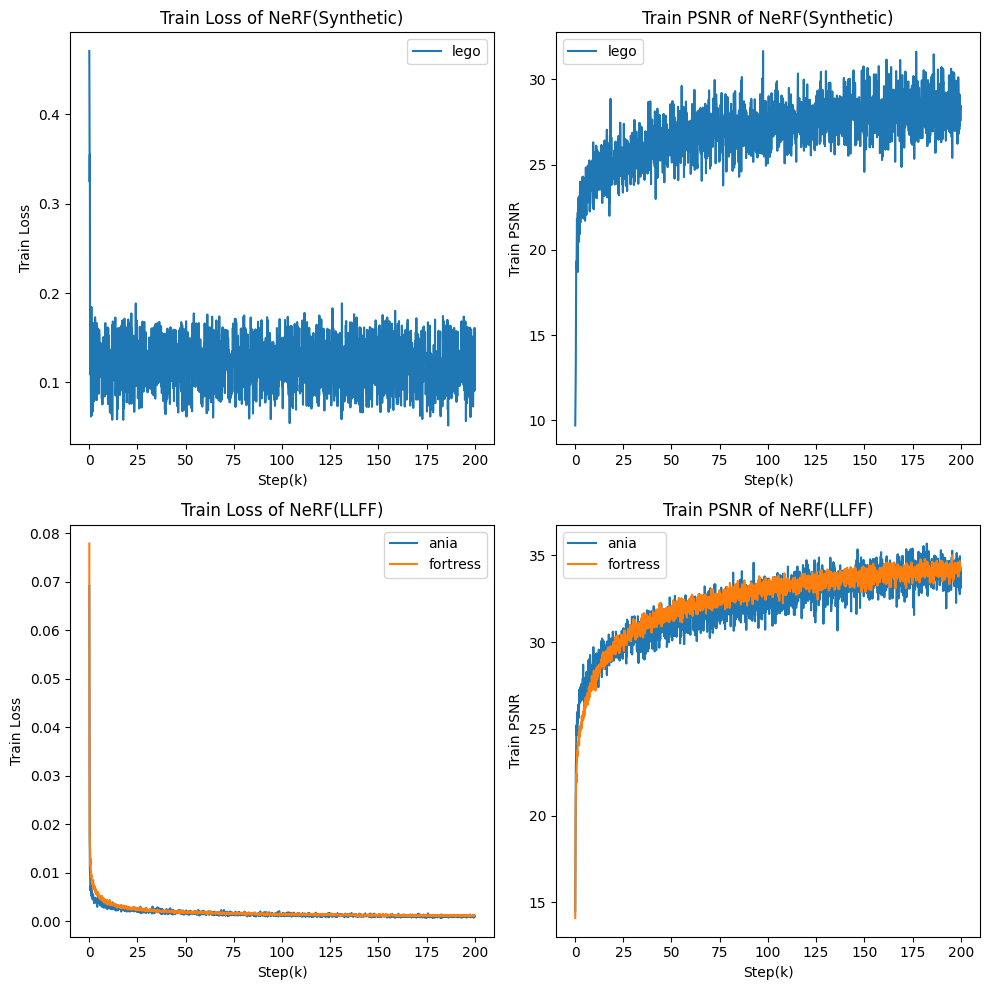

In [21]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(np.array(epochs_train_lego)/1000, loss_train_lego, label='lego')
plt.xlabel('Step(k)')
plt.ylabel('Train Loss')
plt.legend()
plt.title('Train Loss of NeRF(Synthetic)')

plt.subplot(2, 2, 2)
plt.plot(np.array(epochs_train_lego)/1000, psnr_train_lego, label='lego')
plt.xlabel('Step(k)')
plt.ylabel('Train PSNR')
plt.legend()
plt.title('Train PSNR of NeRF(Synthetic)')

plt.subplot(2, 2, 3)
plt.plot(np.array(epochs_train_ania)/1000, loss_train_ania, label='ania')
plt.plot(np.array(epochs_train_fortress)/1000, loss_train_fortress, label='fortress')
plt.xlabel('Step(k)')
plt.ylabel('Train Loss')
plt.legend()
plt.title('Train Loss of NeRF(LLFF)')

plt.subplot(2, 2, 4)
plt.plot(np.array(epochs_train_ania)/1000, psnr_train_ania, label='ania')
plt.plot(np.array(epochs_train_fortress)/1000, psnr_train_fortress, label='fortress')

plt.xlabel('Step(k)')
plt.ylabel('Train PSNR')
plt.legend()
plt.title('Train PSNR of NeRF(LLFF)')

plt.tight_layout()

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/nerf.png')
plt.show()
plt.close()